In [15]:
import warnings
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import os
import numpy as np
import pandas as pd
from pandas import read_csv
import seaborn as sns

In [16]:
os.chdir("C:\\Users")
data = pd.DataFrame(pd.read_csv("Titanic-Dataset.csv"))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data=data.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)

In [18]:
print(data.shape)
print(data.dtypes)
print(data.info())

(891, 8)
Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


In [19]:
data.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [20]:
perc = ((data['Sex'].value_counts())/len(data))*100
print('percentage of gender:\n',perc)

percentage of gender:
 Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


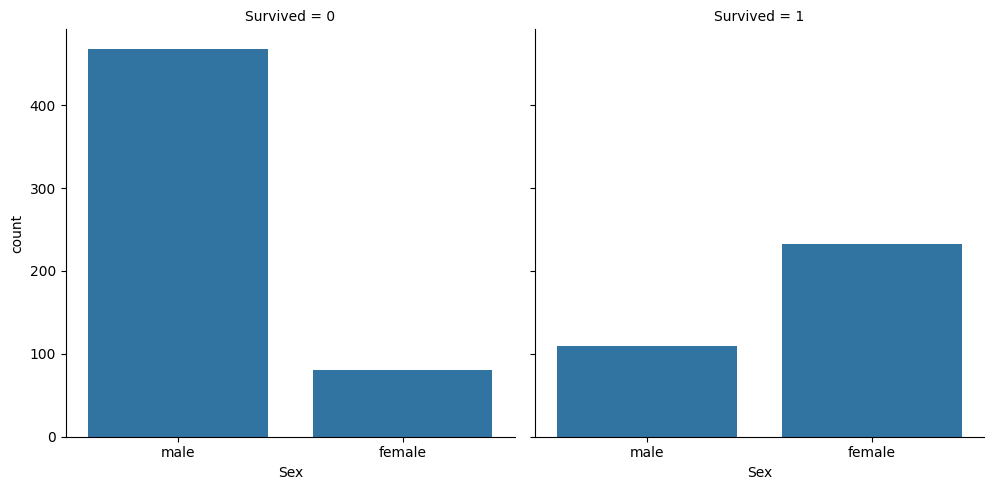

In [21]:
sns.catplot(data=data , x='Sex', col='Survived', kind='count')

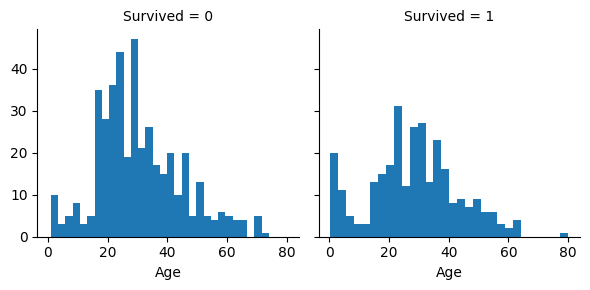

In [22]:
v2 = sns.FacetGrid(data, col='Survived')

v2.map(plt.hist, 'Age', bins=30)

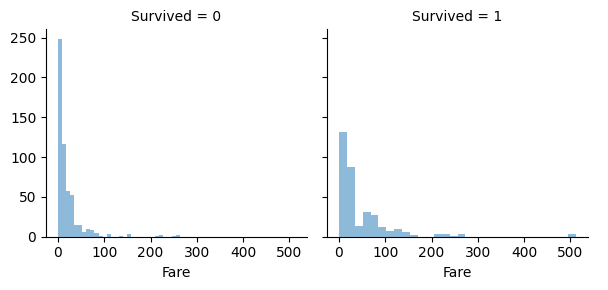

In [23]:
warnings.filterwarnings("ignore")
v3 = sns.FacetGrid(data, col='Survived')
v3.map(plt.hist, 'Fare', alpha=0.5, bins=30)
v3.add_legend()

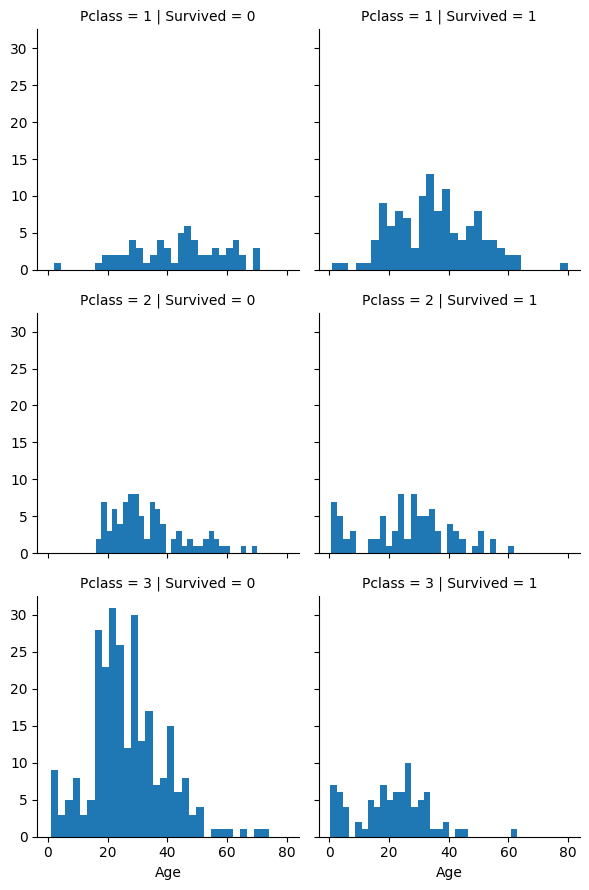

In [24]:
v4 = sns.FacetGrid(data, col='Survived', row='Pclass')

v4.map(plt.hist, 'Age', bins=30)

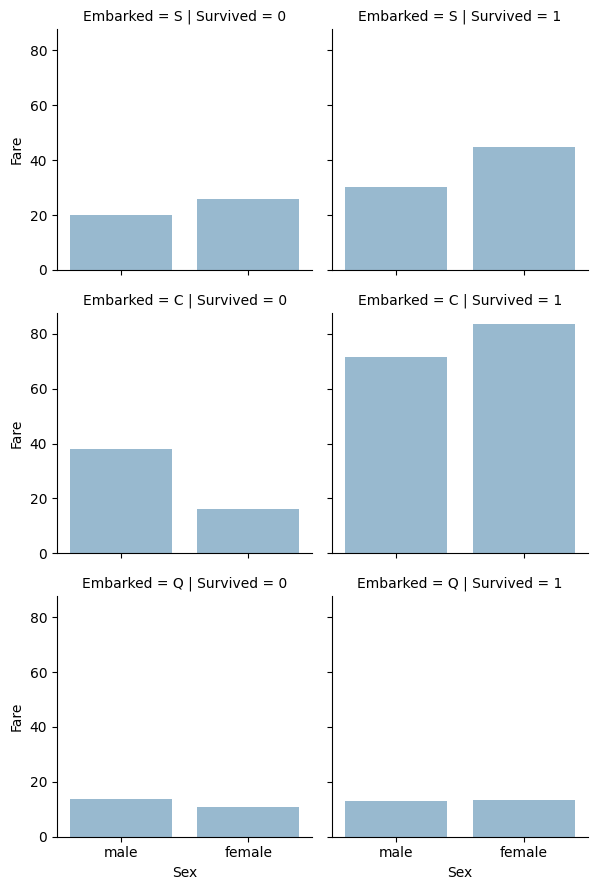

In [25]:
warnings.filterwarnings("ignore")
v5 = sns.FacetGrid(data, col='Survived', row='Embarked')
v5.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
v5.add_legend()

In [26]:
print(data.duplicated().sum())
data[data.duplicated()]

111


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
47,1,3,female,NaN,0,0,7.7500,Q
76,0,3,male,NaN,0,0,7.8958,S
77,0,3,male,NaN,0,0,8.0500,S
87,0,3,male,NaN,0,0,8.0500,S
95,0,3,male,NaN,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,NaN,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


In [27]:
data = data.drop_duplicates()
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


missing values in columns: 
 Survived      0
Pclass        0
Sex           0
Age         104
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


<Axes: >

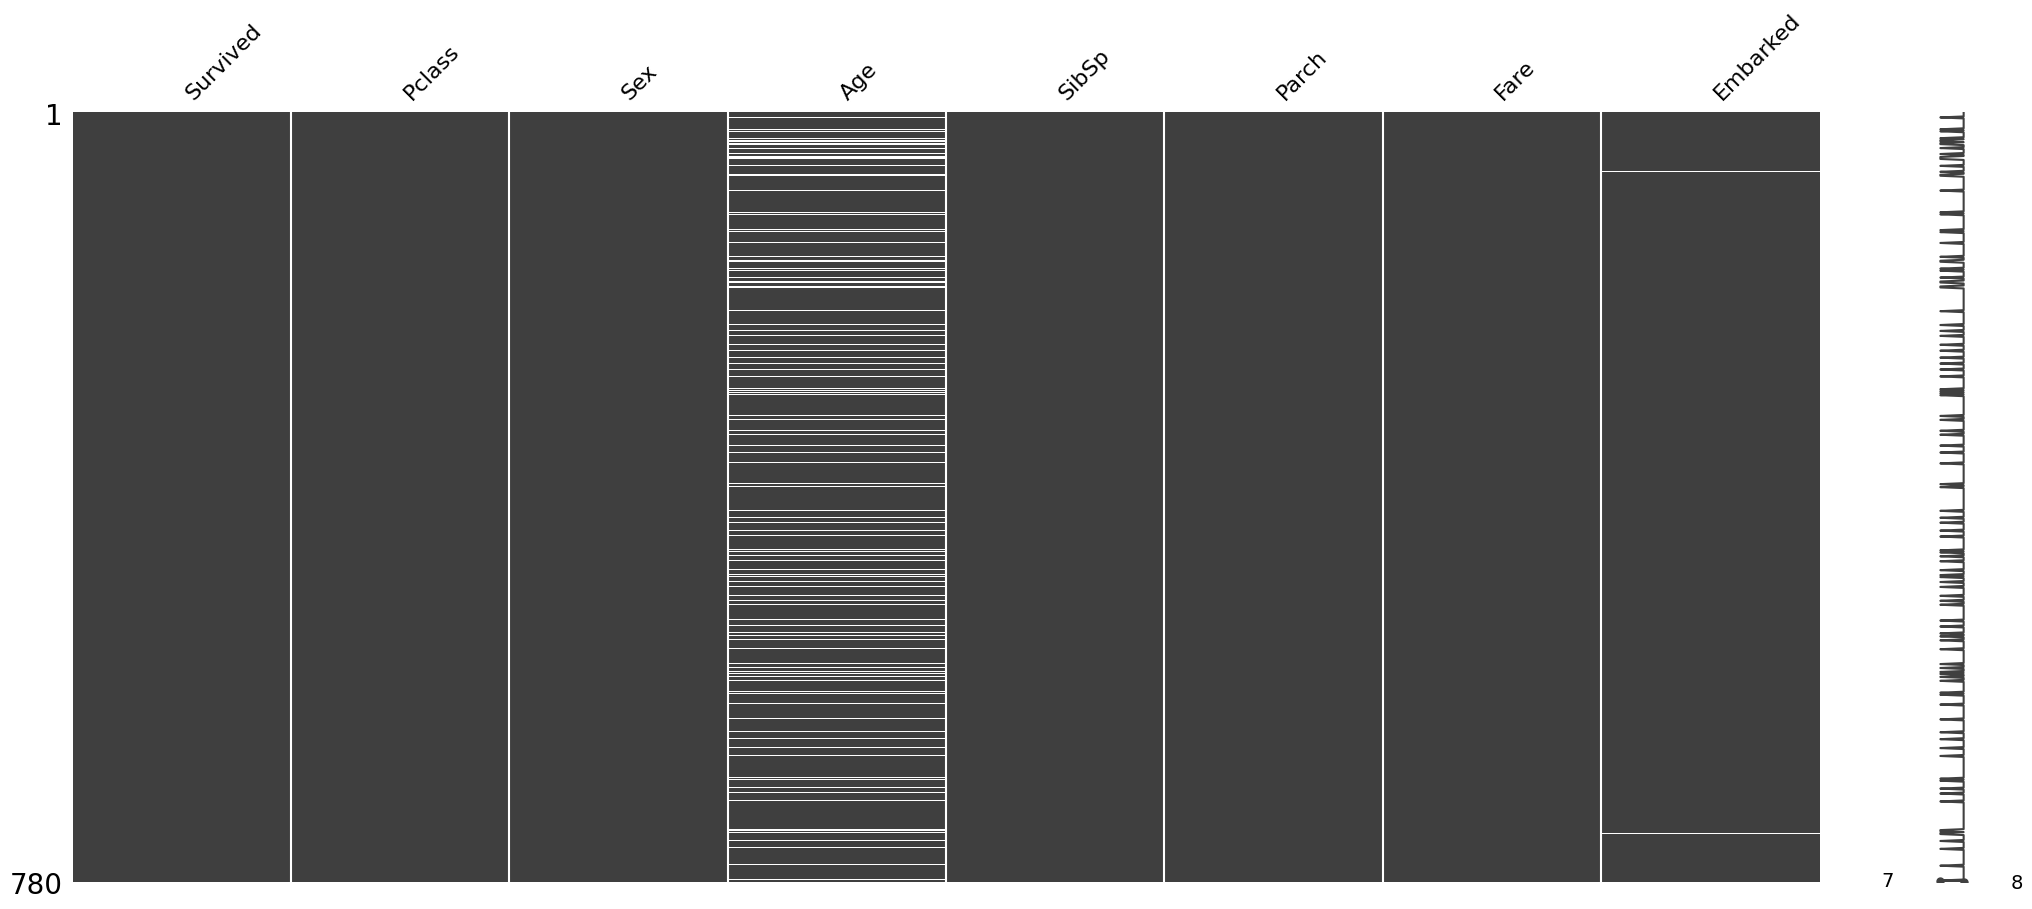

In [28]:
print("missing values in columns: \n",data.isna().sum())
msno.matrix(data)

In [29]:
Age_mean = data['Age'].mean()
Age_std = data['Age'].std()

In [30]:
num_na = data['Age'].isna().sum()

In [32]:
data.loc[data['Age'].isna(), 'Age']

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
828   NaN
839   NaN
849   NaN
868   NaN
888   NaN
Name: Age, Length: 104, dtype: float64

In [33]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

<Axes: >

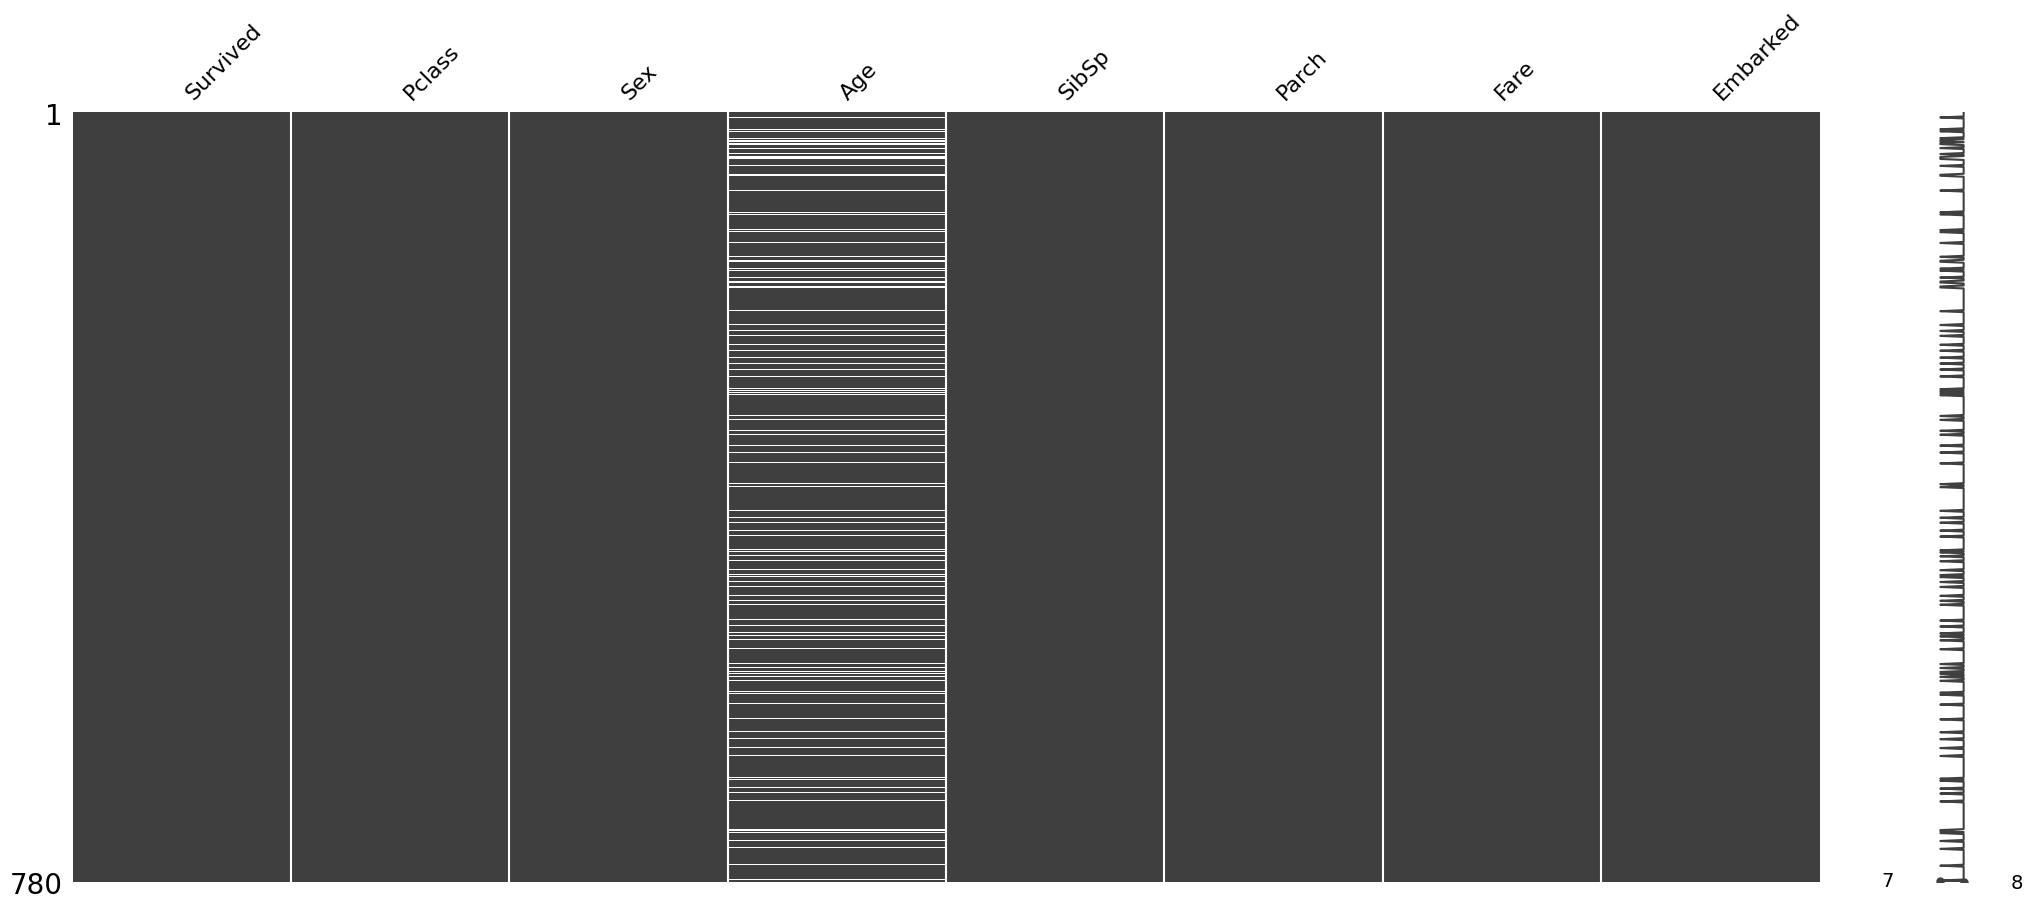

In [34]:
msno.matrix(data)